In [ ]:
using ProfileView

In [2]:
function alloc1() 
    for i = 1:1000
        string("execution",i)
    end
end

alloc1 (generic function with 1 method)

In [3]:
function alloc2() 
    for i = 1:10000
        string("execution",i)
    end
end

alloc2 (generic function with 1 method)

In [4]:
alloc1()
alloc2()

In [5]:
function execute()
    map(x->(x%2==0 ? alloc1() : alloc2()),1:2000);
end

execute (generic function with 1 method)

In [6]:
execute()

2000-element Array{Void,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 ⋮      
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [7]:
Profile.clear()
Profile.init(delay = 0.05)
@profile execute()
Profile.print(format=:flat)

 Count File                        Line Function                               
  1599 .\<missing>                   -1 anonymous                              
   137 .\In[2]                        3 alloc1()                               
  1462 .\In[3]                        3 alloc2()                               
  1599 .\In[5]                        2 #1                                     
     2 .\abstractarray.jl           573 copy!(::Array{Any,1}, ::Core.Infere... 
     2 .\array.jl                   396 _collect(::Type{Any}, ::Core.Infere... 
     1 .\array.jl                   488 _collect(::UnitRange{Int64}, ::Base... 
  1598 .\array.jl                   489 _collect(::UnitRange{Int64}, ::Base... 
     2 .\array.jl                   393 collect(::Type{Any}, ::Core.Inferen... 
  1598 .\array.jl                   508 collect_to!(::Array{Void,1}, ::Base... 
     1 .\array.jl                   562 getindex                               
   234 .\array.jl                   774 

### 0.01
```
 Count File                        Line Function                               
  1391 .\<missing>                   -1 anonymous                              
   121 .\In[14]                       3 alloc1()                               
  1270 .\In[15]                       3 alloc2()     
  ```
### Default 0.001
```
Count File                        Line Function                               
  1438 .\<missing>                   -1 anonymous                              
   129 .\In[14]                       3 alloc1()                               
  1309 .\In[15]                       3 alloc2() 
   ```
 ### 0.0001
 ```
  Count File                        Line Function                               
  1445 .\<missing>                   -1 anonymous                              
   137 .\In[14]                       3 alloc1()                               
  1308 .\In[15]                       3 alloc2() 
 ```
   ### 0.00005
  ```
   Count File                        Line Function                               
  1386 .\<missing>                   -1 anonymous                              
   116 .\In[14]                       3 alloc1()                               
  1270 .\In[15]                       3 alloc2() 
  ```
 ### 0.00001
 ```
  Count File                        Line Function                               
  1401 .\<missing>                   -1 anonymous                              
     1 .\In[14]                       2 alloc1()                               
   126 .\In[14]                       3 alloc1()                               
     1 .\In[15]                       2 alloc2()                               
  1273 .\In[15]                       3 alloc2()  
  ```


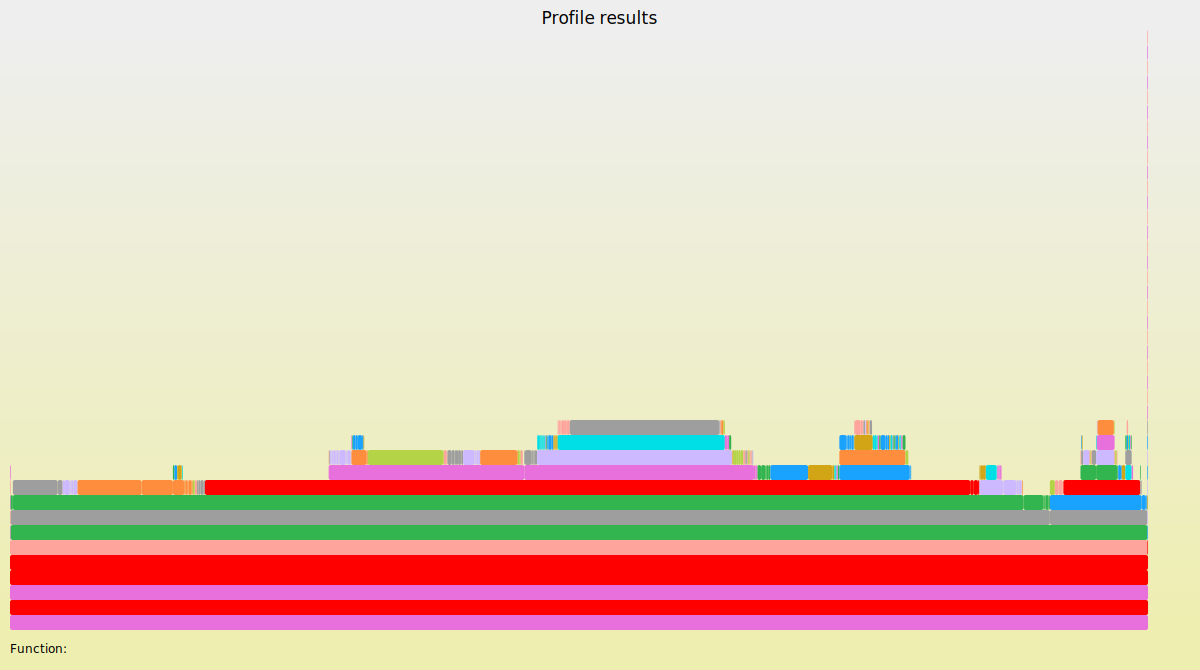

In [8]:
ProfileView.view()

In [8]:
typedict(x) = Dict(fn=>getfield(x, fn) for fn ∈ fieldnames(x)) 

typedict (generic function with 1 method)

In [15]:
include("Lab3\\graphs.jl")
include("Lab3\\graphsmod.jl")

GraphsMod

In [16]:
srand(1000)
@time g1=Graphs.generate_random_graph()
srand(1000)
@time g2=GraphsMod.generate_random_graph()
g1==g2

  0.129695 seconds (1.17 M allocations: 33.300 MiB, 6.73% gc time)
  0.020258 seconds (3.17 k allocations: 5.258 MiB)


true

In [17]:
srand(1000)
@time g1=Graphs.generate_random_nodes()
srand(1000)
@time g2=GraphsMod.generate_random_nodes()
all(x->typedict(x[1])==typedict(x[2]),zip(g1,g2))

  0.025001 seconds (7.18 k allocations: 374.632 KiB)
  0.020127 seconds (6.07 k allocations: 346.241 KiB)


true

In [18]:
@time Graphs.test_graph()

false
false
false
false
false
false
false
false
false
false
  2.037052 seconds (12.35 M allocations: 677.342 MiB, 10.86% gc time)


In [19]:
@time GraphsMod.test_graph()

false
false
false
false
false
false
false
false
false
false
  0.905666 seconds (489.50 k allocations: 390.848 MiB, 11.15% gc time)


In [22]:
#Po dodaniu @inbounds
include("Lab3\\graphs.jl")
include("Lab3\\graphsmod.jl")

GraphsMod

In [24]:
@time GraphsMod.test_graph()

false
false
false
false
false
false
false
false
false
false
  0.448382 seconds (378.89 k allocations: 385.083 MiB, 18.34% gc time)


In [1]:
#Po zmianie ternary na if i rand(Bool)
include("Lab3\\graphs.jl")
include("Lab3\\graphsmod.jl")

GraphsMod

In [3]:
@time GraphsMod.test_graph()

false
false
false
false
false
false
false
false
false
false
  0.428753 seconds (380.35 k allocations: 384.913 MiB, 20.21% gc time)


In [5]:
@time Graphs.test_graph()

false
false
false
false
false
false
false
false
false
false
  1.421794 seconds (12.19 M allocations: 668.852 MiB, 14.21% gc time)
